In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df=pd.read_csv('Occupancy_Estimation.csv')

In [3]:
df=df.drop(['Date'],axis=1)
df=df.drop(['Time'],axis=1)

In [4]:
x=df.drop(['Room_Occupancy_Count'],axis=1)
y=df['Room_Occupancy_Count']

In [5]:
from sklearn.model_selection import train_test_split
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [6]:
samples

[(      S1_Temp  S2_Temp  S3_Temp  S4_Temp  S1_Light  S2_Light  S3_Light  \
  9840    25.06    25.13    24.56    25.19         0         0         0   
  8771    25.38    25.38    25.06    25.56         0         0         0   
  7603    25.25    25.25    24.75    25.63         0         0         0   
  919     26.38    27.94    26.06    26.44       150       239       181   
  7752    25.19    25.19    24.69    25.44         0         0         0   
  ...       ...      ...      ...      ...       ...       ...       ...   
  1053    25.88    26.00    25.56    26.06         0         0         0   
  7786    25.19    25.19    24.63    25.38         0         0         0   
  2424    25.06    25.06    24.50    25.31         5         5        28   
  8064    25.06    25.06    24.69    25.25         6         6        32   
  7942    25.06    25.06    24.63    25.06         4         4        20   
  
        S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound  S5_CO2  S5_CO2_Slope  \
  9

In [7]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 

In [8]:
nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
print("Done iterating!\n")

Iterating on sample  1
iteration  1
sigmoid 9.401376314718863 3.548622491093265
fit
iteration  2
sigmoid 2.3030039710571493 8.829958249749584
fit
iteration  3
sigmoid 5.738657453563497 1.8796659932000126
fit
iteration  4
rbf 0.9823301760920644 8.545424251433799
fit
iteration  5
sigmoid 4.347821504329233 7.162327277868815
fit
iteration  6
rbf 3.9678006594901802 1.359841642171823
fit
iteration  7
sigmoid 3.167721515319993 4.379436903302408
fit
iteration  8
rbf 6.901586246100155 3.7878332882311705
fit
iteration  9
rbf 7.619099522282947 9.640448702515254
fit
iteration  10
rbf 6.750819191872477 9.518053493694495
fit
iteration  11
rbf 3.415957608982223 3.288805380423645
fit
iteration  12
rbf 3.1385190700212737 8.26609058412269
fit
iteration  13
rbf 4.6712554549106855 3.6962162002574726
fit
iteration  14
sigmoid 2.469118356473782 5.8187599625574435
fit
iteration  15
sigmoid 7.110053385618755 2.5514856315553756
fit
iteration  16
sigmoid 8.74915132182648 5.760247707857022
fit
iteration  17
rbf 

In [9]:
print(df_sample)

   sample#  best accuracy         c     gamma kernel
0        1          99.18  9.253601  0.040423    rbf
1        2          99.47  5.635493  0.035427    rbf
2        3          99.41  2.162098  0.027161    rbf
3        4          92.96  4.597396  0.409671    rbf
4        5          99.51  1.239134  0.022895    rbf
5        6          90.65  9.354886  0.602802    rbf
6        7          98.29  4.144225  0.086406    rbf
7        8          97.93  1.316127  0.093526    rbf
8        9          99.37  5.026788  0.013073    rbf
9       10          96.38  8.679840  0.153840    rbf


In [10]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]

In [11]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [12]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

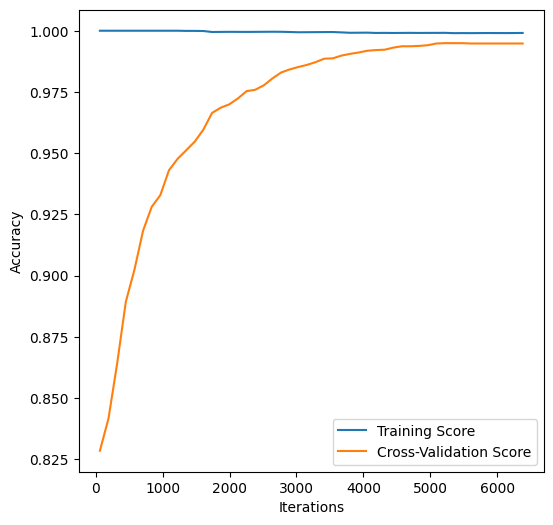

In [13]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()